In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def run_bell_test_experiment(angle_a, angle_b):
    # Create quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Generate entangled state
    qc.h(0)
    qc.cx(0, 1)

    # Rotate qubit 0 by angle_a and qubit 1 by angle_b
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)

    # Measure the qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    # Execute the quantum circuit on the local simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    
    return counts

# Define angles in radians for the polarization settings
angle_22_5 = 22.5 * (3.14159265 / 180)
angle_67_5 = 67.5 * (3.14159265 / 180)
angle_0 = 0

# Run experiments
counts_22_5 = run_bell_test_experiment(angle_22_5, angle_22_5)
counts_67_5 = run_bell_test_experiment(angle_67_5, angle_67_5)
counts_no_polarizers = run_bell_test_experiment(angle_0, angle_0)

# Function to calculate N(ϕ) as #Coincidences - #AntiCoincidences
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Get the N values
N0 = calculate_N(counts_no_polarizers)
N_22_5 = calculate_N(counts_22_5)
N_67_5 = calculate_N(counts_67_5)

# Calculate delta
delta = abs(N_22_5 - N_67_5) / N0 - 0.25

print(f"Counts for 22.5 degrees: {counts_22_5}")
print(f"Counts for 67.5 degrees: {counts_67_5}")
print(f"Counts with no polarizer: {counts_no_polarizers}")
print(f"N0: {N0}, N(22.5): {N_22_5}, N(67.5): {N_67_5}, Delta: {delta}")

# Check Freedman's inequality
if delta <= 0:
    print("Freedman's inequality is satisfied.")
else:
    print("Freedman's inequality is violated.")

Counts for 22.5 degrees: {'11': 503, '00': 521}
Counts for 67.5 degrees: {'00': 530, '11': 494}
Counts with no polarizer: {'11': 509, '00': 515}
N0: 1024, N(22.5): 1024, N(67.5): 1024, Delta: -0.25
Freedman's inequality is satisfied.


In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def run_bell_test_experiment(angle_a, angle_b):
    # Create quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Generate entangled state
    qc.h(0)
    qc.cx(0, 1)

    # Rotate qubit 0 by angle_a and qubit 1 by angle_b
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)

    # Measure the qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    # Execute the quantum circuit on the local simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    
    return counts

# Function to calculate N(ϕ) as #Coincidences - #AntiCoincidences
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences


# Calculating Freedman’s inequality for all angles from 0 to 90 degrees
for degree in range(91): # creates a sequence from 0 to 90
    angle_rad = np.deg2rad(degree) # convert degree to radian

    counts = run_bell_test_experiment(angle_rad, angle_rad)

    N0 = calculate_N(run_bell_test_experiment(0, 0))
    N_angle = calculate_N(counts)

    # Calculate delta
    delta = abs(N_angle - N0) / N0 - 0.25

    # Check Freedman's inequality
    if delta <= 0:
        print(f"At {degree} degrees, Freedman's inequality is satisfied.")
    else:
        print(f"At {degree} degrees, Freedman's inequality is violated.")

At 0 degrees, Freedman's inequality is satisfied.
At 1 degrees, Freedman's inequality is satisfied.
At 2 degrees, Freedman's inequality is satisfied.
At 3 degrees, Freedman's inequality is satisfied.
At 4 degrees, Freedman's inequality is satisfied.
At 5 degrees, Freedman's inequality is satisfied.
At 6 degrees, Freedman's inequality is satisfied.
At 7 degrees, Freedman's inequality is satisfied.
At 8 degrees, Freedman's inequality is satisfied.
At 9 degrees, Freedman's inequality is satisfied.
At 10 degrees, Freedman's inequality is satisfied.
At 11 degrees, Freedman's inequality is satisfied.
At 12 degrees, Freedman's inequality is satisfied.
At 13 degrees, Freedman's inequality is satisfied.
At 14 degrees, Freedman's inequality is satisfied.
At 15 degrees, Freedman's inequality is satisfied.
At 16 degrees, Freedman's inequality is satisfied.
At 17 degrees, Freedman's inequality is satisfied.
At 18 degrees, Freedman's inequality is satisfied.
At 19 degrees, Freedman's inequality is s

In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def run_bell_test_experiment(angle_a, angle_b):
    # Create quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Generate entangled state
    qc.h(0)
    qc.cx(0, 1)

    # Rotate qubit 0 by angle_a and qubit 1 by angle_b
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)

    # Measure the qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    # Execute the quantum circuit on the local simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    
    return counts

# Function to calculate N(ϕ) as #Coincidences - #AntiCoincidences
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences


# Calculating Freedman’s inequality for all angles from 0 to 90 degrees
for degree in range(91): # creates a sequence from 0 to 90
    angle_rad = np.deg2rad(degree) # convert degree to radian

    counts = run_bell_test_experiment(angle_rad, angle_rad)

    N0 = calculate_N(run_bell_test_experiment(0, 0))
    N_angle = calculate_N(counts)

    # Calculate delta
    delta = abs(N_angle - N0) / N0 - 0.25

    # Check Freedman's inequality
    if delta <= 0:
        print(f"At {degree} degrees, Freedman's inequality is satisfied.")
    else:
        print(f"At {degree} degrees, Freedman's inequality is violated.")

At 0 degrees, Freedman's inequality is satisfied.
At 1 degrees, Freedman's inequality is satisfied.
At 2 degrees, Freedman's inequality is satisfied.
At 3 degrees, Freedman's inequality is satisfied.
At 4 degrees, Freedman's inequality is satisfied.
At 5 degrees, Freedman's inequality is satisfied.
At 6 degrees, Freedman's inequality is satisfied.
At 7 degrees, Freedman's inequality is satisfied.
At 8 degrees, Freedman's inequality is satisfied.
At 9 degrees, Freedman's inequality is satisfied.
At 10 degrees, Freedman's inequality is satisfied.
At 11 degrees, Freedman's inequality is satisfied.
At 12 degrees, Freedman's inequality is satisfied.
At 13 degrees, Freedman's inequality is satisfied.
At 14 degrees, Freedman's inequality is satisfied.
At 15 degrees, Freedman's inequality is satisfied.
At 16 degrees, Freedman's inequality is satisfied.
At 17 degrees, Freedman's inequality is satisfied.
At 18 degrees, Freedman's inequality is satisfied.
At 19 degrees, Freedman's inequality is s

In [5]:
# from qiskit import QuantumCircuit, Aer, execute
# from qiskit.visualization import plot_histogram
# import numpy as np

# def run_bell_test_experiment(angle_a, angle_b):
#     # Create quantum circuit with 2 qubits and 2 classical bits
#     qc = QuantumCircuit(2, 2)

#     # Generate entangled state
#     qc.h(0)
#     qc.cx(0, 1)

#     # Rotate qubit 0 by angle_a and qubit 1 by angle_b
#     qc.ry(2 * angle_a, 0)
#     qc.ry(2 * angle_b, 1)

#     # Measure the qubits
#     qc.measure(0, 0)
#     qc.measure(1, 1)

#     # Execute the quantum circuit on the local simulator
#     backend = Aer.get_backend('qasm_simulator')
#     job = execute(qc, backend, shots=1024)
#     result = job.result()
#     counts = result.get_counts(qc)
    
#     return counts

# # Function to calculate N(ϕ) as #Coincidences - #AntiCoincidences
# def calculate_N(counts):
#     coincidences = counts.get('00', 0) + counts.get('11', 0)
#     anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
#     return coincidences - anti_coincidences

# # Constant angle
# angle_b = np.deg2rad(67.5)

# # Calculating Freedman’s inequality for multiple angles for first qubit
# for degree in np.arange(0, 90.25, 0.25): # creates a sequence from 0 to 90 with step of 0.25
#     angle_a = np.deg2rad(degree) # convert degree to radian

#     counts_a = run_bell_test_experiment(angle_a, angle_b)
#     counts_b = run_bell_test_experiment(angle_b, angle_a)

#     N_a = calculate_N(counts_a)
#     N_b = calculate_N(counts_b)

#     # Calculate delta
#     delta = abs(N_a - N_b) / N_b - 0.25

#     # Check Freedman's inequality
#     if delta <= 0:
#         print(f"At {degree} degrees, Freedman's inequality is satisfied. Delta: {delta}")
#     else:
#         print(f"At {degree} degrees, Freedman's inequality is violated. Delta: {delta}")

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def run_bell_test_experiment(angle_a, angle_b):
    # Create quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Generate entangled state
    qc.h(0)
    qc.cx(0, 1)

    # Rotate qubit 0 by angle_a and qubit 1 by angle_b
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)

    # Measure the qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    # Execute the quantum circuit on the local simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    
    return counts

# Function to calculate N(ϕ) as #Coincidences - #AntiCoincidences
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Constant angle
angle_b = np.deg2rad(67.5)

# Lists to track angles
violation_angles = []
satisfaction_angles = []

# Calculating Freedman’s inequality for multiple angles for first qubit
for degree in np.arange(0, 90.25, 0.25): # creates a sequence from 0 to 90 with step of 0.25
    angle_a = np.deg2rad(degree) # convert degree to radian

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    # Calculate delta
    delta = abs(N_a - N_b) / N_b - 0.25

    # Check Freedman's inequality and save angles
    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print the results
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

Angles where Freedman's inequality is satisfied: [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.25, 20.5, 20.75, 21.0, 21.25, 21.5, 21.75, 22.25, 22.5, 23.5, 26.0, 27.0, 27.25, 27.75, 28.5, 28.75, 29.0, 29.25, 29.5, 30.0, 30.25, 30.5, 30.75, 31.0, 31.25, 31.5, 31.75, 32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, 33.75, 34.0, 34.25, 34.5, 34.75, 35.0, 35.25, 35.5, 35.75, 36.0, 36.25, 36.5, 36.75, 37.0, 37.25, 37.5, 37.75, 38.0, 38.25, 38.5, 38.75, 39.0, 39.25, 39.5, 39.75, 40.0, 40.25, 40.5, 40.75, 41.0, 41.25, 41.5, 41.75, 42.0, 42.25, 42.5, 42.75, 43.

-0.2556657223796034 0.0
-0.2918994413407821 0.25
-0.29819277108433734 0.5
-0.27586206896551724 0.75
-0.31231454005934717 1.0
-0.25 1.25
-0.2613960113960114 1.5
-0.28313253012048195 1.75
-0.29285714285714287 2.0
-0.2802114803625378 2.25
-0.256006006006006 2.5
-0.2531545741324921 2.75
-0.3044871794871795 3.0
-0.2727272727272727 3.25
-0.2726537216828479 3.5
-0.272875816993464 3.75
-0.25643086816720256 4.0
-0.27893890675241156 4.25
-0.2988599348534202 4.5
-0.3304195804195804 4.75
-0.3042372881355932 5.0
-0.37454212454212454 5.25
-0.2642857142857143 5.5
-0.30415162454873645 5.75
-0.45 6.0
-0.2572992700729927 6.25
-0.2644404332129964 6.5
-0.3068181818181818 6.75
-0.30283018867924527 7.0
-0.2898406374501992 7.25
-0.36328125 7.5
-0.34090909090909094 7.75
-0.26593625498007967 8.0
-0.42803030303030304 8.25
-0.2542194092827004 8.5
-0.2670940170940171 8.75
-0.35612244897959183 9.0
-0.3472222222222222 9.25
-0.2543859649122807 9.5
-0.46649484536082475 9.75
-0.26304347826086955 10.0
-0.40873015873015

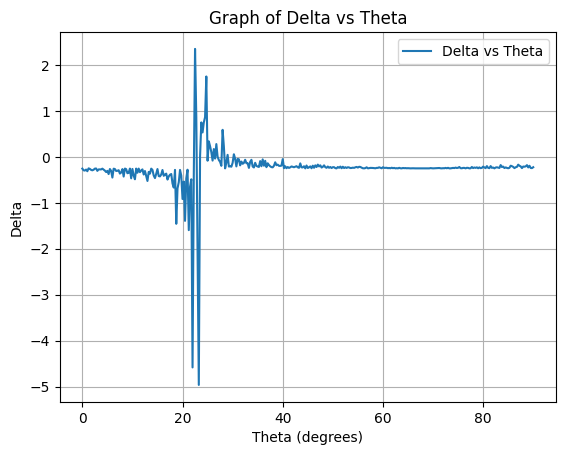

In [14]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to run the Bell test experiment
def run_bell_test_experiment(angle_a, angle_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

# Function to calculate N(ϕ)
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Fixed angle_b
angle_b = np.deg2rad(67.5)

# Lists to hold results and plotting data
violation_angles = []
satisfaction_angles = []
theta_values = []
delta_values = []

# Run experiment and check Freedman’s inequality over a range of angles
for degree in np.arange(0, 90.25, 0.25):
    angle_a = np.deg2rad(degree)

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    delta = abs(N_a - N_b) / N_b - 0.25
    print(delta,degree)

    theta_values.append(degree)
    delta_values.append(delta)

    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print angle lists
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

# Plot the graph
plt.plot(theta_values, delta_values, label='Delta vs Theta')
plt.xlabel('Theta (degrees)')
plt.ylabel('Delta')
plt.title('Graph of Delta vs Theta')
plt.legend()
plt.grid(True)
plt.show()

-0.2777777777777778 0.0
-0.27695417789757415 0.25
-0.3134005763688761 0.5
-0.34893048128342247 0.75
-0.2762390670553936 1.0
-0.2763157894736842 1.25
-0.30817174515235457 1.5
-0.27593659942363113 1.75
-0.3044412607449857 2.0
-0.29923076923076924 2.25
-0.2684049079754601 2.5
-0.29154302670623145 2.75
-0.31309148264984227 3.0
-0.265625 3.25
-0.3574626865671642 3.5
-0.2979233226837061 3.75
-0.2786624203821656 4.0
-0.2861842105263158 4.25
-0.28460207612456745 4.5
-0.2533003300330033 4.75
-0.33771929824561403 5.0
-0.326158940397351 5.25
-0.31498194945848373 5.5
-0.27405498281786944 5.75
-0.26136363636363635 6.0
-0.32942238267148016 6.25
-0.3118556701030928 6.5
-0.30283018867924527 6.75
-0.3643911439114391 7.0
-0.2578125 7.25
-0.3940677966101695 7.5
-0.31343283582089554 7.75
-0.3097609561752988 8.0
-0.2625 8.25
-0.39285714285714285 8.5
-0.31437768240343344 8.75
-0.3235930735930736 9.0
-0.25432900432900435 9.25
-0.3119047619047619 9.5
-0.3853711790393013 9.75
-0.2871900826446281 10.0
-0.289800

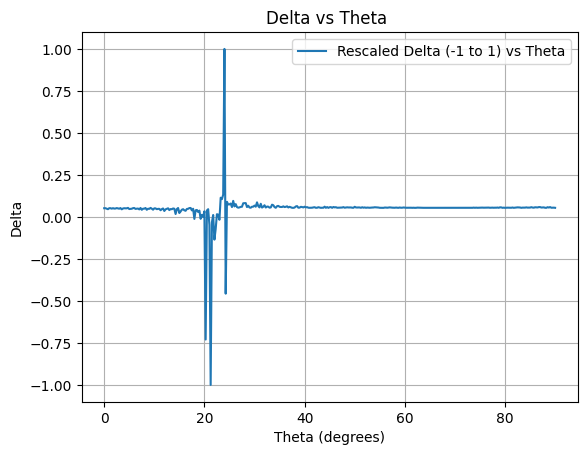

In [26]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to run the Bell test experiment
def run_bell_test_experiment(angle_a, angle_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

# Function to calculate N(ϕ)
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Fixed angle_b
angle_b = np.deg2rad(67.5)

# Lists to hold results and plotting data
violation_angles = []
satisfaction_angles = []
theta_values = []
delta_values = []

# Run experiment and check Freedman’s inequality over a range of angles
for degree in np.arange(0, 90.25, 0.25):
    angle_a = np.deg2rad(degree)

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    delta = abs(N_a - N_b) / N_b - 0.25

    theta_values.append(degree)
    delta_values.append(delta)
    
    print(delta , degree)

    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print angle lists
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

# Rescale delta values to be within the range of -1 to 1
min_delta = np.min(delta_values)
max_delta = np.max(delta_values)
rescaled_delta_values = [2 * ((delta - min_delta) / (max_delta - min_delta)) - 1 for delta in delta_values]

# Plot the graph of rescaled delta vs Theta
plt.plot(theta_values, rescaled_delta_values, label='Rescaled Delta (-1 to 1) vs Theta')
plt.xlabel('Theta (degrees)')
plt.ylabel('Delta')
plt.title('Delta vs Theta ')
plt.legend()
plt.grid(True)
plt.show()


-0.2718579234972678 0.0
-0.29 0.25
-0.2857142857142857 0.5
-0.27564102564102566 0.75
-0.2664835164835165 1.0
-0.3104229607250755 1.25
-0.29972375690607733 1.5
-0.3026315789473684 1.75
-0.2613960113960114 2.0
-0.3833333333333333 2.25
-0.2942477876106195 2.5
-0.3560171919770774 2.75
-0.2711480362537764 3.0
-0.25638977635782745 3.25
-0.2839506172839506 3.5
-0.31211180124223603 3.75
-0.36178247734138974 4.0
-0.3319112627986348 4.25
-0.276578073089701 4.5
-0.32272727272727275 4.75
-0.31976744186046513 5.0
-0.2666112956810631 5.25
-0.2712014134275618 5.5
-0.2752707581227437 5.75
-0.2534246575342466 6.0
-0.39652014652014655 6.25
-0.3280669144981413 6.5
-0.28409090909090906 6.75
-0.2614942528735632 7.0
-0.2803030303030303 7.25
-0.3057768924302789 7.5
-0.2737154150197628 7.75
-0.2796610169491525 8.0
-0.3230769230769231 8.25
-0.3701550387596899 8.5
-0.25418410041841005 8.75
-0.40789473684210525 9.0
-0.37083333333333335 9.25
-0.4207317073170732 9.5
-0.2780373831775701 9.75
-0.3412863070539419 10.

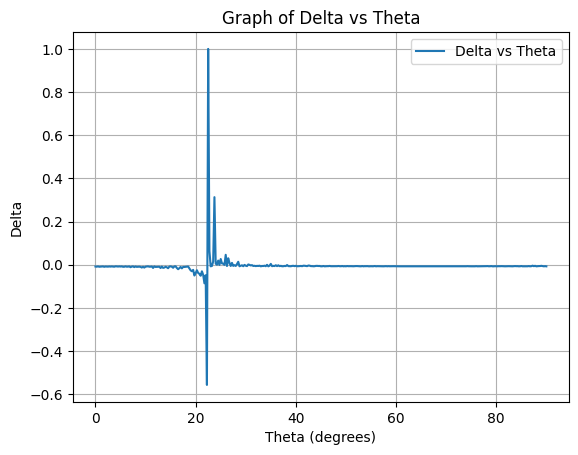

In [38]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to run the Bell test experiment
def run_bell_test_experiment(angle_a, angle_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

# Function to calculate N(ϕ)
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Fixed angle_b
angle_b = np.deg2rad(67.5)

# Lists to hold results and plotting data
violation_angles = []
satisfaction_angles = []
theta_values = []
delta_values = []

# Run experiment and check Freedman’s inequality over a range of angles
for degree in np.arange(0, 90.25, 0.25):
    angle_a = np.deg2rad(degree)

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    delta = abs(N_a - N_b) / N_b - 0.25
    print(delta,degree)

    theta_values.append(degree)
    delta_values.append(delta)

    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print angle lists
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

min_delta = np.min(delta_values)
max_delta = np.max(delta_values)
rescaled_delta_values = [2 * ((delta - min_delta) / (max_delta - min_delta)) for delta in delta_values]

# max_abs_delta = max(abs(delta) for delta in delta_values)
# delta_values_1 = [delta / max_abs_delta for delta in delta_values]
# Plot the graph
plt.plot(theta_values,delta_values_1, label='Delta vs Theta')
plt.xlabel('Theta (degrees)')
plt.ylabel('Delta')
plt.title('Graph of Delta vs Theta')
plt.legend()
plt.grid(True)
plt.show()

-0.2752808988764045 0.0
-0.27949061662198393 0.25
-0.2981586402266289 0.5
-0.2642857142857143 0.75
-0.2700573065902579 1.0
-0.25 1.25
-0.2733918128654971 1.5
-0.2901146131805158 1.75
-0.3058823529411765 2.0
-0.30780346820809246 2.25
-0.3304953560371517 2.5
-0.2560240963855422 2.75
-0.26904761904761904 3.0
-0.3445121951219512 3.25
-0.275974025974026 3.5
-0.2983383685800604 3.75
-0.3433333333333333 4.0
-0.3341750841750842 4.25
-0.26257861635220126 4.5
-0.3575268817204301 4.75
-0.315625 5.0
-0.26706484641638223 5.25
-0.40969581749049433 5.5
-0.26063829787234044 5.75
-0.42622950819672134 6.0
-0.3754752851711026 6.25
-0.41475095785440613 6.5
-0.2876712328767123 6.75
-0.4523809523809524 7.0
-0.3467741935483871 7.25
-0.314638783269962 7.5
-0.27334630350194555 7.75
-0.32916666666666666 8.0
-0.2823886639676113 8.25
-0.3375 8.5
-0.25 8.75
-0.32196969696969696 9.0
-0.40384615384615385 9.25
-0.31976744186046513 9.5
-0.2848258706467662 9.75
-0.31756756756756754 10.0
-0.25460829493087556 10.25
-0.27

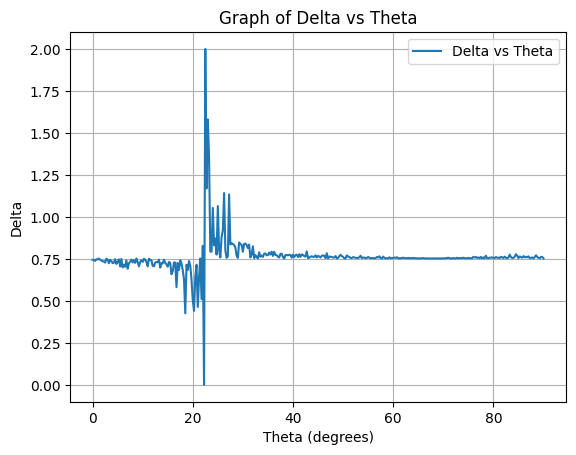

In [42]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to run the Bell test experiment
def run_bell_test_experiment(angle_a, angle_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

# Function to calculate N(ϕ)
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Fixed angle_b
angle_b = np.deg2rad(67.5)

# Lists to hold results and plotting data
violation_angles = []
satisfaction_angles = []
theta_values = []
delta_values = []

# Run experiment and check Freedman’s inequality over a range of angles
for degree in np.arange(0, 90.25, 0.25):
    angle_a = np.deg2rad(degree)

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    delta = abs(N_a - N_b) / N_b - 0.25
    print(delta,degree)

    theta_values.append(degree)
    delta_values.append(delta)

    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print angle lists
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

min_delta = np.min(delta_values)
max_delta = np.max(delta_values)
rescaled_delta_values = [2 * ((delta - min_delta) / (max_delta - min_delta)) for delta in delta_values]

# max_abs_delta = max(abs(delta) for delta in delta_values)
# delta_values_1 = [delta / max_abs_delta for delta in delta_values]
# Plot the graph
plt.plot(theta_values,rescaled_delta_values, label='Delta vs Theta')
plt.xlabel('Theta (degrees)')
plt.ylabel('Delta')
plt.title('Graph of Delta vs Theta')
plt.legend()
plt.grid(True)
plt.show()

Angles where Freedman's inequality is satisfied: [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.25, 20.5, 20.75, 21.0, 21.25, 21.5, 22.0, 23.5, 25.5, 26.0, 26.25, 27.0, 27.25, 27.5, 27.75, 28.0, 28.5, 28.75, 29.0, 29.5, 29.75, 30.0, 30.25, 30.5, 30.75, 31.0, 31.25, 31.5, 31.75, 32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, 33.75, 34.0, 34.25, 34.5, 34.75, 35.0, 35.25, 35.5, 35.75, 36.0, 36.25, 36.5, 36.75, 37.0, 37.25, 37.5, 37.75, 38.0, 38.25, 38.5, 38.75, 39.0, 39.25, 39.5, 39.75, 40.0, 40.25, 40.5, 40.75, 41.0, 41.25, 41.5, 41.75, 42.0, 42.25, 42.5,

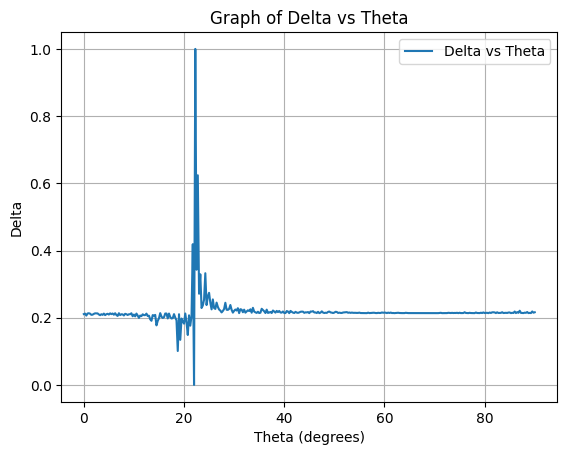

In [45]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to run the Bell test experiment
def run_bell_test_experiment(angle_a, angle_b):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(2 * angle_a, 0)
    qc.ry(2 * angle_b, 1)
    qc.measure(0, 0)
    qc.measure(1, 1)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    return counts

# Function to calculate N(ϕ)
def calculate_N(counts):
    coincidences = counts.get('00', 0) + counts.get('11', 0)
    anti_coincidences = counts.get('01', 0) + counts.get('10', 0)
    return coincidences - anti_coincidences

# Fixed angle_b
angle_b = np.deg2rad(67.5)

# Lists to hold results and plotting data
violation_angles = []
satisfaction_angles = []
theta_values = []
delta_values = []

# Run experiment and check Freedman’s inequality over a range of angles
for degree in np.arange(0, 90.25, 0.25):
    angle_a = np.deg2rad(degree)

    counts_a = run_bell_test_experiment(angle_a, angle_b)
    counts_b = run_bell_test_experiment(angle_b, angle_a)

    N_a = calculate_N(counts_a)
    N_b = calculate_N(counts_b)

    delta = abs(N_a - N_b) / N_b - 0.25
    # print(delta,degree)

    theta_values.append(degree)
    delta_values.append(delta)

    if delta <= 0:
        satisfaction_angles.append(degree)
    else:
        violation_angles.append(degree)

# Print angle lists
print(f"Angles where Freedman's inequality is satisfied: {satisfaction_angles}")
print(f"Angles where Freedman's inequality is violated: {violation_angles}")

min_delta = np.min(delta_values)
max_delta = np.max(delta_values)
rescaled_delta_values = [((delta - min_delta) / (max_delta - min_delta)) for delta in delta_values]
print(rescaled_delta_values,degree)

# max_abs_delta = max(abs(delta) for delta in delta_values)
# delta_values_1 = [delta / max_abs_delta for delta in delta_values]
# Plot the graph
plt.plot(theta_values,rescaled_delta_values, label='Delta vs Theta')
plt.xlabel('Theta (degrees)')
plt.ylabel('Delta')
plt.title('Graph of Delta vs Theta')
plt.legend()
plt.grid(True)
plt.show()